In [1]:
import pandas as pd

# Load the uploaded crane sightings and disaster datasets
cranes_df = pd.read_csv(r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\cleaned datasets\cleaned_common_crane.csv")
disasters_df = pd.read_csv(r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\cleaned datasets\cleaned_natural_disasters.csv")

In [2]:
# Display the column names of the crane dataset to find the correct date field
print(cranes_df.columns)
print(disasters_df.columns)

Index(['GLOBAL UNIQUE IDENTIFIER', 'OBSERVATION COUNT', 'COUNTRY', 'Latitude',
       'Longitude', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED',
       'DURATION MINUTES'],
      dtype='object')
Index(['DisNo.', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Event Name', 'ISO', 'Country',
       'Subregion', 'Region', 'Location', 'Origin', 'Associated Types',
       'Latitude', 'Longitude', 'Start Date', 'End Date'],
      dtype='object')


In [3]:
# Convert observation date to datetime and extract year
cranes_df['OBSERVATION DATE'] = pd.to_datetime(cranes_df['OBSERVATION DATE'], errors='coerce')
cranes_df['Year'] = cranes_df['OBSERVATION DATE'].dt.year

# Convert disaster 'Start Date' to datetime and extract year
disasters_df['Start Date'] = pd.to_datetime(disasters_df['Start Date'], errors='coerce')
disasters_df['Year'] = disasters_df['Start Date'].dt.year


In [4]:

# Group sightings and disasters by country and year
crane_counts = cranes_df.groupby(['COUNTRY', 'Year']).size().reset_index(name='crane_sightings')
disaster_counts = disasters_df.groupby(['Country', 'Year']).size().reset_index(name='disaster_count')

In [5]:
# Merge datasets on country and year
merged_df = pd.merge(crane_counts, disaster_counts, left_on=['COUNTRY', 'Year'], right_on=['Country', 'Year'])

# Clean up merged data
merged_df = merged_df[['COUNTRY', 'Year', 'crane_sightings', 'disaster_count']]

merged_df

,COUNTRY,Year,crane_sightings,disaster_count
0,Afghanistan,2021.0,2,3
1,Algeria,1979.0,1,1
2,Algeria,2018.0,1,1
3,Austria,1993.0,1,1
4,Austria,1997.0,2,1
...,...,...,...,...
640,United States,2022.0,1,14
641,United States,2023.0,284,12
642,Uzbekistan,2000.0,1,1
643,Uzbekistan,2020.0,5,1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


Pearson Correlation: -0.01 (p=7.21e-01)
Spearman Correlation: 0.06 (p=1.38e-01)


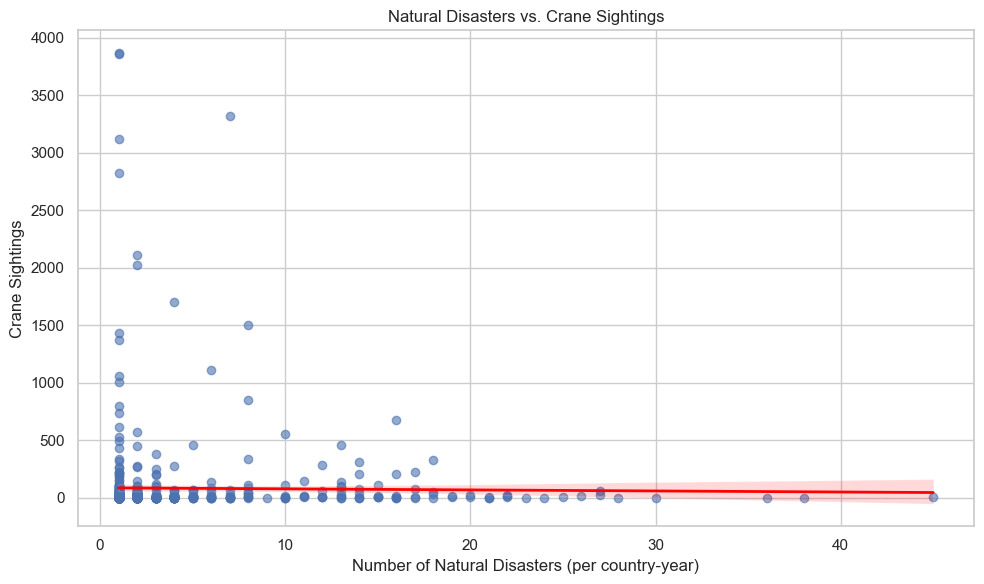

In [7]:
# Set plot style
sns.set(style="whitegrid")

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_df,
    x='disaster_count',
    y='crane_sightings',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Title and labels
plt.title('Natural Disasters vs. Crane Sightings')
plt.xlabel('Number of Natural Disasters (per country-year)')
plt.ylabel('Crane Sightings')

# Calculate correlations
pearson_corr, p_pearson = pearsonr(merged_df['disaster_count'], merged_df['crane_sightings'])
spearman_corr, p_spearman = spearmanr(merged_df['disaster_count'], merged_df['crane_sightings'])

# Display correlation values
print(f"Pearson Correlation: {pearson_corr:.2f} (p={p_pearson:.2e})")
print(f"Spearman Correlation: {spearman_corr:.2f} (p={p_spearman:.2e})")

plt.tight_layout()
plt.show()


EUROPE REGION
Pearson Correlation: 0.06 (p=2.94e-01)
Spearman Correlation: 0.07 (p=2.30e-01)


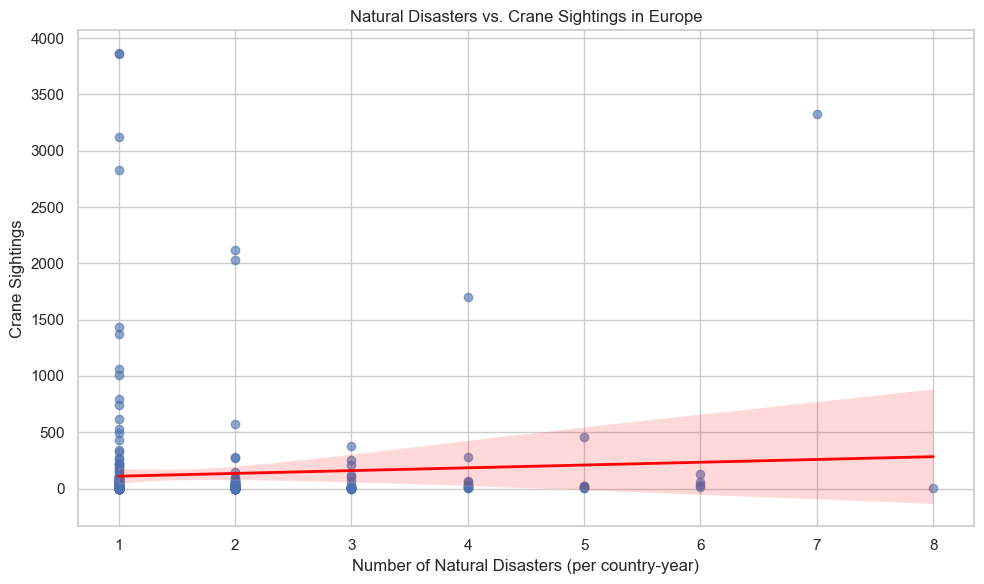


ASIA REGION
Pearson Correlation: 0.08 (p=2.55e-01)
Spearman Correlation: 0.23 (p=8.55e-04)


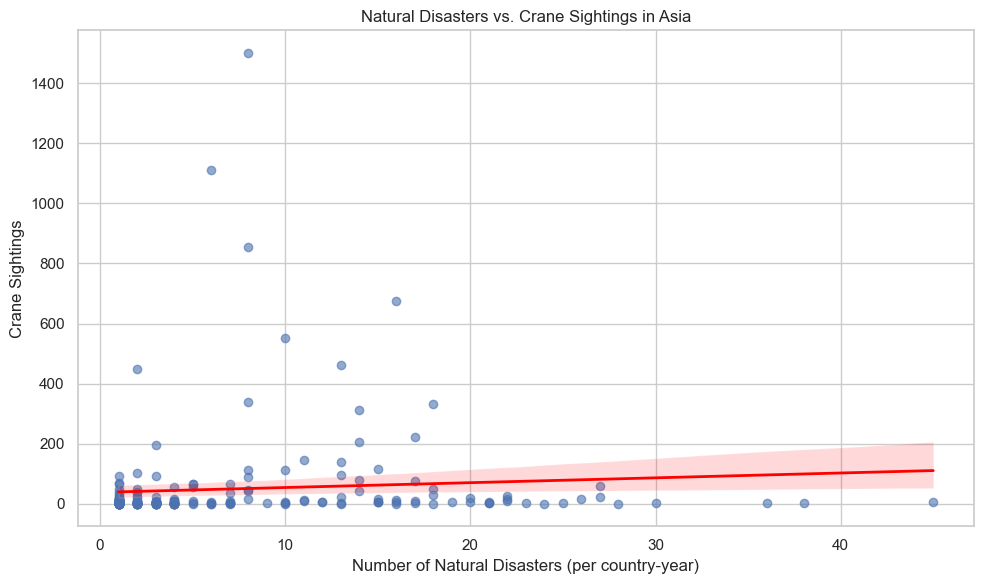


AFRICA REGION
Pearson Correlation: -0.05 (p=6.33e-01)
Spearman Correlation: 0.06 (p=5.82e-01)


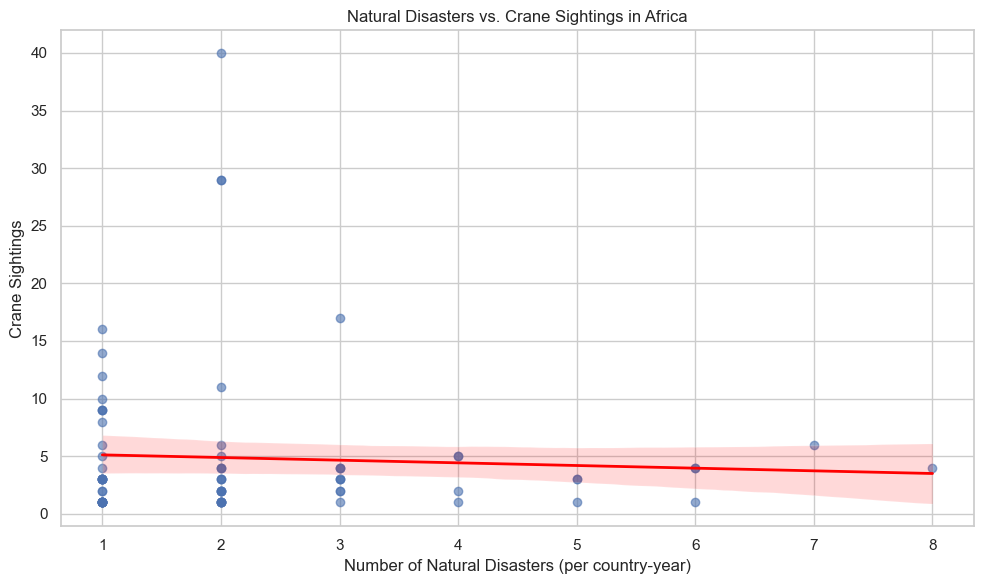

In [8]:
# Define a function to create and display regional scatter plots with regression and correlation
def plot_region_disasters_vs_cranes(region_name):
    # Filter disasters and cranes by region
    regional_disasters = disasters_df[disasters_df['Region'] == region_name]
    regional_crane_counts = cranes_df[cranes_df['COUNTRY'].isin(regional_disasters['Country'].unique())]

    # Group data by country and year
    regional_crane_agg = regional_crane_counts.groupby(['COUNTRY', 'Year']).size().reset_index(name='crane_sightings')
    regional_disaster_agg = regional_disasters.groupby(['Country', 'Year']).size().reset_index(name='disaster_count')

    # Merge datasets
    regional_merged = pd.merge(
        regional_crane_agg,
        regional_disaster_agg,
        left_on=['COUNTRY', 'Year'],
        right_on=['Country', 'Year']
    )[['COUNTRY', 'Year', 'crane_sightings', 'disaster_count']]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=regional_merged,
        x='disaster_count',
        y='crane_sightings',
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    plt.title(f'Natural Disasters vs. Crane Sightings in {region_name}')
    plt.xlabel('Number of Natural Disasters (per country-year)')
    plt.ylabel('Crane Sightings')
    plt.grid(True)

    # Correlations
    pearson_corr, p_pearson = pearsonr(regional_merged['disaster_count'], regional_merged['crane_sightings'])
    spearman_corr, p_spearman = spearmanr(regional_merged['disaster_count'], regional_merged['crane_sightings'])

    print(f"\n{region_name.upper()} REGION")
    print(f"Pearson Correlation: {pearson_corr:.2f} (p={p_pearson:.2e})")
    print(f"Spearman Correlation: {spearman_corr:.2f} (p={p_spearman:.2e})")

    plt.tight_layout()
    plt.show()

# Plot for Europe, Asia, and Africa
plot_region_disasters_vs_cranes("Europe")
plot_region_disasters_vs_cranes("Asia")
plot_region_disasters_vs_cranes("Africa")


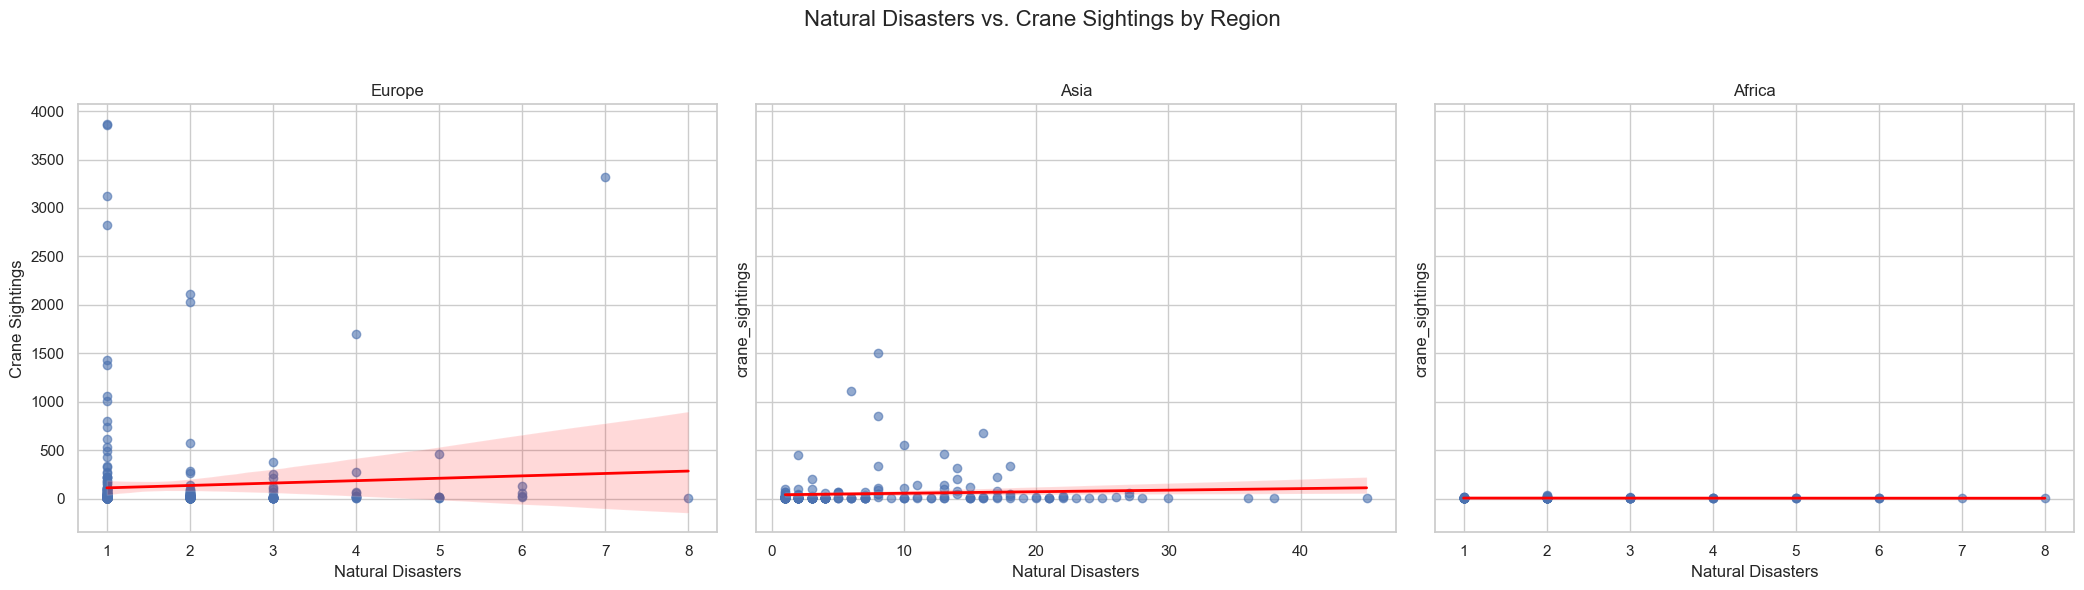

In [9]:
# Create a combined visual using subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Define region names and axes
regions = ['Europe', 'Asia', 'Africa']
axes_titles = ['Europe', 'Asia', 'Africa']

for ax, region in zip(axes, regions):
    # Filter data
    regional_disasters = disasters_df[disasters_df['Region'] == region]
    regional_cranes = cranes_df[cranes_df['COUNTRY'].isin(regional_disasters['Country'].unique())]

    # Aggregate sightings and disaster counts
    crane_agg = regional_cranes.groupby(['COUNTRY', 'Year']).size().reset_index(name='crane_sightings')
    disaster_agg = regional_disasters.groupby(['Country', 'Year']).size().reset_index(name='disaster_count')

    # Merge
    regional_merged = pd.merge(
        crane_agg, disaster_agg,
        left_on=['COUNTRY', 'Year'],
        right_on=['Country', 'Year']
    )[['COUNTRY', 'Year', 'crane_sightings', 'disaster_count']]

    # Plot
    sns.regplot(
        data=regional_merged,
        x='disaster_count',
        y='crane_sightings',
        ax=ax,
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    ax.set_title(f'{region}')
    ax.set_xlabel('Natural Disasters')
    ax.grid(True)

# Shared y-axis label
axes[0].set_ylabel('Crane Sightings')

# Overall title
fig.suptitle('Natural Disasters vs. Crane Sightings by Region', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()